In [1]:
import pandas as pd
import numpy as np
import os 

### Read the input and output of the simulator

##### Define the path to the folder of the outputs and the samples.csv
The outputs here are generated using ModularCirc Library (Tutorial_03)

In [2]:
out_path = '/Users/mfamili/work/ModularCirc/Tutorials/Tutorial_03/Outputs/Out_01'
in_path = '/Users/mfamili/work/ModularCirc/Tutorials/Tutorial_03/samples_Naghavi.csv'

In [3]:
parameters = pd.read_csv(in_path)
len(parameters)
parameters.head()

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,...,ven.v_ref,la.v,la.delay,la.t_tr,la.tau,la.t_max,lv.delay,lv.t_tr,lv.tau,lv.t_max
0,269.127129,0.203019,983.203905,3.191950,10.882681,174.101430,8.300360,3.482009,0.627641,0.402329,...,2800,93,60.678471,91.017706,10.113078,60.678471,0,169.899718,10.113078,113.266479
1,206.088069,0.375773,1657.093140,2.099627,5.960964,120.683530,3.062308,3.585927,0.319441,0.545859,...,2800,93,102.169077,153.253616,17.028180,102.169077,0,286.073416,17.028180,190.715611
2,340.443400,0.326133,847.199201,3.553927,7.698856,156.317995,7.622434,4.488115,0.282748,0.557149,...,2800,93,161.251675,241.877512,26.875279,161.251675,0,451.504689,26.875279,301.003126
3,337.839332,0.266355,635.118368,1.920611,5.667924,108.365966,4.497573,4.746986,0.586480,0.622089,...,2800,93,47.615070,71.422606,7.935845,47.615070,0,133.322197,7.935845,88.881465
4,224.294309,0.344414,1267.312617,4.102724,10.830418,139.032554,7.158306,2.806614,0.502147,0.512776,...,2800,93,123.959484,185.939226,20.659914,123.959484,0,347.086555,20.659914,231.391037


##### Read and process outputs
- Read the outputs and convert them to a list of dictionaries. report if any output files are missing
- convert outputs to a numpy array of (number of samples, number of outputs)

In [4]:
outputs = []
num_sim = 1000
no_sim_result_list = []
# Loop through the expected range of files
for i in range(num_sim):
    filename = f"all_outputs_{i}.csv"
    file_path = os.path.join(out_path, filename)
    
    if os.path.exists(file_path):  # Check if the file exists
        try:
            # Read the DataFrame and append it to the list
            df = pd.read_csv(file_path)
            outputs.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            outputs.append(False)  # Append False if there's an error
    else:
        no_sim_result_list.append(i)
        print(f"File {file_path} doesn't exist")
        outputs.append(False)  # Append False if the file doesn't exist

outs = np.array([df.iloc[-1].values for df in outputs])
print(np.array(outs).shape)
print(np.array(outs).dtype)

outputs[0].head()

(1000, 17)
float64


,time_ind,v_ao,v_art,v_ven,v_la,v_lv,p_lv,q_av,p_ao,p_art,q_ao,p_ven,q_art,p_la,q_ven,q_mv,T
0,0,103.362593,951.954516,2894.391443,7.130009,29.537054,4.264184,0.0,16.562945,16.276730,0.001063,0.542164,0.016003,0.642794,-0.009247,0.0,8908.813090
1,1,103.362163,951.948472,2894.401572,7.126354,29.537054,4.573774,0.0,16.560826,16.274837,0.001063,0.542222,0.016001,0.638235,-0.008823,0.0,8909.217613
2,2,103.361734,951.942430,2894.411527,7.122872,29.537054,4.895389,0.0,16.558710,16.272944,0.001062,0.542279,0.015999,0.633632,-0.008394,0.0,8909.622136
3,3,103.361304,951.936387,2894.421307,7.119564,29.537054,5.228885,0.0,16.556595,16.271051,0.001061,0.542335,0.015997,0.628986,-0.007962,0.0,8910.026659
4,4,103.360875,951.930345,2894.430911,7.116431,29.537054,5.574118,0.0,16.554482,16.269158,0.001060,0.542390,0.015995,0.624300,-0.007527,0.0,8910.431182


In [5]:
outs[0]

array([ 1.00000000e+03,  1.03392562e+02,  9.52418344e+02,  2.89393794e+03,
        7.12440643e+00,  2.95023649e+01,  4.25600996e+00,  0.00000000e+00,
        1.67105600e+01,  1.64220421e+01,  1.07205044e-03,  5.39558686e-01,
        1.61538043e-02,  6.40661078e-01, -9.29021034e-03,  0.00000000e+00,
        9.31333623e+03])

##### Update the parameters to drop the parameter sets where the output is missing

In [6]:
updated_parameters = parameters.drop(no_sim_result_list)
updated_parameters= updated_parameters.to_numpy()
updated_parameters.shape

(1000, 33)

##### Setup autoemulate 
- here we are choosing to preprocess the outputs in order to reduce the dimentionality


In [7]:
from autoemulate.compare import AutoEmulate
em = AutoEmulate()
em.setup(updated_parameters, outs, preprocess_outputs=['vae', 'pca'])


/Users/mfamili/work/autoemulate/autoemulate/compare.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


TypeError: 'NoneType' object is not iterable

In [ ]:
best_model = em.compare()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

autoemulate - Failed to cross-validate RadialBasisFunctions
Traceback (most recent call last):
  File "/Users/mfamili/work/autoemulate/autoemulate/cross_validate.py", line 51, in _run_cv
    cv_results = cross_validate(
                 ^^^^^^^^^^^^^^^
  File "/Users/mfamili/work/env_autoem/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mfamili/work/env_autoem/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 443, in cross_validate
    _warn_or_raise_about_fit_failures(results, error_score)
  File "/Users/mfamili/work/env_autoem/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 529, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Belo

In [ ]:
em.summarise_cv()

,model,short,rmse,r2
0,GaussianProcess,gp,43.379886,0.837146
1,GradientBoosting,gb,56.689584,0.770785
2,LightGBM,lgbm,55.090417,0.770400
3,ConditionalNeuralProcess,cnp,49.798392,0.765424
4,RandomForest,rf,91.705554,0.519104
5,SecondOrderPolynomial,sop,71.111342,0.508966


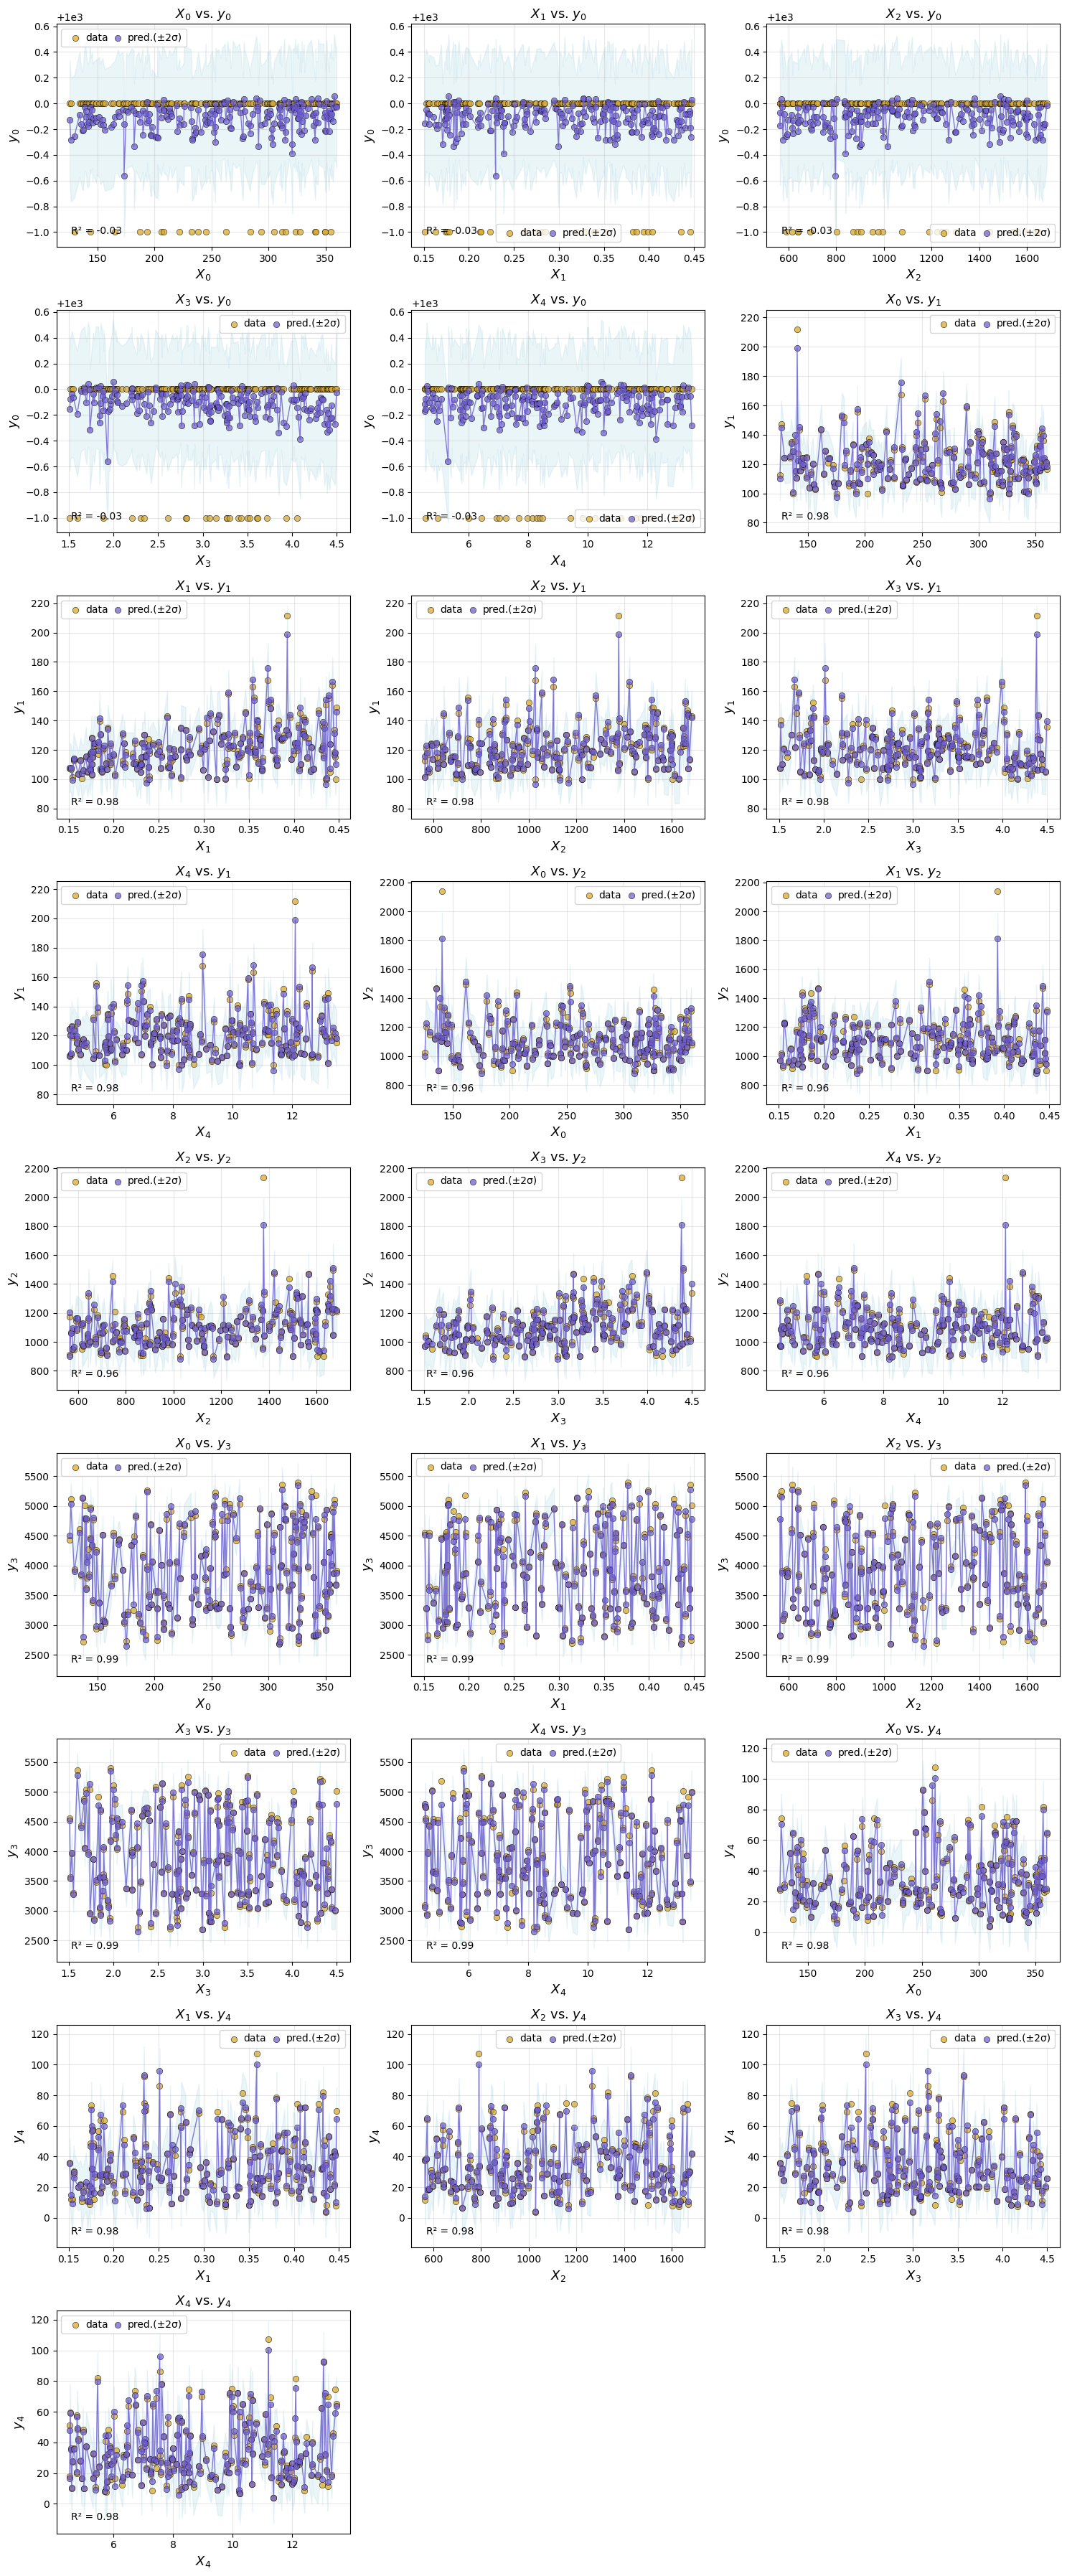

In [ ]:
gp = em.get_model("GaussianProcess")
em.evaluate(gp)
em.plot_eval(gp, input_index=[0,1,2,3,4], output_index=[0,1,2,3,4])

Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


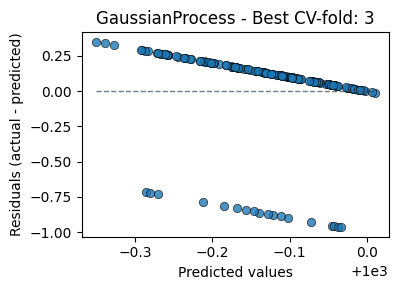

In [ ]:
em.plot_cv(style="residual_vs_predicted")